# Regularization and sparsity <h3 style="color:green">Frequentist version</h3>

### Seeking bias with relish

_Adapted from Josep Fortiana (2023-04-24) by Jordi Abante (2024-04-19)_

# `Hitters` dataset in the `ISLR2` package

In [1]:
#install.packages("ISLR2",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR2)

Loading required package: ISLR2



### Baseball _Hitters_ Data

#### Description: Prediction of annual salary as a function of performance.

Major League Baseball Data from the 1986 and 1987 seasons 

#### Format

A data frame with 322 observations of major league players on the following 20 variables.

01. `AtBat`:     Number of times at bat in 1986,
02. `Hits`:      Number of hits in 1986,
03. `HmRun`:     Number of home runs in 1986,
04. `Runs`:      Number of runs in 1986,
05. `RBI`:       Number of runs batted in in 1986,
06. `Walks`:     Number of walks in 1986,
07. `Years`:     Number of years in the major leagues,
08. `CAtBat`:    Number of times at bat during his career,
09. `CHits`:     Number of hits during his career,
10. `CHmRun`:    Number of home runs during his career,
11. `CRuns`:     Number of runs during his career,
12. `CRBI`:      Number of runs batted in during his career,
13. `CWalks`:    Number of walks during his career,
14. `League`:    A factor with levels `A` and `N` indicating player's league at the end of 1986,
15. `Division`:  A factor with levels `E` and `W` indicating player's division at the end of 1986,
16. `PutOuts`:   Number of put outs in 1986,
17. `Assists`:   Number of assists in 1986,
18. `Errors`:    Number of errors in 1986,
19. `Salary`:    1987 annual salary on opening day in thousands of dollars,
20. `NewLeague`: A factor with levels `A` and `N` indicating player's league at the beginning of 1987.

#### Source

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.   
This is part of the data that was used in the 1988 ASA Graphics Section Poster Session.   
The salary data were originally from Sports Illustrated, April 20, 1987.   
The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

In [2]:
data(Hitters)
str(Hitters)

'data.frame':	322 obs. of  20 variables:
 $ AtBat    : int  293 315 479 496 321 594 185 298 323 401 ...
 $ Hits     : int  66 81 130 141 87 169 37 73 81 92 ...
 $ HmRun    : int  1 7 18 20 10 4 1 0 6 17 ...
 $ Runs     : int  30 24 66 65 39 74 23 24 26 49 ...
 $ RBI      : int  29 38 72 78 42 51 8 24 32 66 ...
 $ Walks    : int  14 39 76 37 30 35 21 7 8 65 ...
 $ Years    : int  1 14 3 11 2 11 2 3 2 13 ...
 $ CAtBat   : int  293 3449 1624 5628 396 4408 214 509 341 5206 ...
 $ CHits    : int  66 835 457 1575 101 1133 42 108 86 1332 ...
 $ CHmRun   : int  1 69 63 225 12 19 1 0 6 253 ...
 $ CRuns    : int  30 321 224 828 48 501 30 41 32 784 ...
 $ CRBI     : int  29 414 266 838 46 336 9 37 34 890 ...
 $ CWalks   : int  14 375 263 354 33 194 24 12 8 866 ...
 $ League   : Factor w/ 2 levels "A","N": 1 2 1 2 2 1 2 1 2 1 ...
 $ Division : Factor w/ 2 levels "E","W": 1 2 2 1 1 2 1 2 2 1 ...
 $ PutOuts  : int  446 632 880 200 805 282 76 121 143 0 ...
 $ Assists  : int  33 43 82 11 40 421 127 28

Detect and remove `NA` values

In [3]:
dim(Hitters)
sum(is.na(Hitters$Salary))
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] 322  20

[1] 59

[1] 263  20

[1] 0

In [4]:
# Prepare x, y for the glmnet syntax
# Convert factors to one-hot indicators
x<-model.matrix(Salary~.,Hitters)[,-1]
y<-Hitters$Salary

Tibshirani (1996) assumes predictor columns centered and standardized to unit variance. Actually the `glmnet()` function has a Boolean parameter `standardize` which does precisely this. Here we standardize "by hand"

In [5]:
xm<-apply(x,2,mean)
xc<-sweep(x,2,xm,"-")
round(max(abs(apply(xc,2,mean))),6) 
xs<-apply(xc,2,sd)
x0<-sweep(xc,2,xs,"/")
str(x0)

[1] 0

 num [1:263, 1:19] -0.602 0.512 0.627 -0.561 1.292 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:263] "-Alan Ashby" "-Alvin Davis" "-Andre Dawson" "-Andres Galarraga" ...
  ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...


### (OLS) Ordinary Least Squares regression

In [6]:
Hitters.ols<-lm(Salary~.,data=Hitters)
summary(Hitters.ols)


Call:
lm(formula = Salary ~ ., data = Hitters)

Residuals:
    Min      1Q  Median      3Q     Max 
-907.62 -178.35  -31.11  139.09 1877.04 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  163.10359   90.77854   1.797 0.073622 .  
AtBat         -1.97987    0.63398  -3.123 0.002008 ** 
Hits           7.50077    2.37753   3.155 0.001808 ** 
HmRun          4.33088    6.20145   0.698 0.485616    
Runs          -2.37621    2.98076  -0.797 0.426122    
RBI           -1.04496    2.60088  -0.402 0.688204    
Walks          6.23129    1.82850   3.408 0.000766 ***
Years         -3.48905   12.41219  -0.281 0.778874    
CAtBat        -0.17134    0.13524  -1.267 0.206380    
CHits          0.13399    0.67455   0.199 0.842713    
CHmRun        -0.17286    1.61724  -0.107 0.914967    
CRuns          1.45430    0.75046   1.938 0.053795 .  
CRBI           0.80771    0.69262   1.166 0.244691    
CWalks        -0.81157    0.32808  -2.474 0.014057 *  
LeagueN       62.5

The $p$-values of several predictors are large, suggesting these have a low predictive power. Possibly at least some of these predictors will be discarded after a selection procedure. In general a large  $p$-value is not enough evidence to discard a predictor (multicollinearity is a property of _a subset_ of predictors)

In [7]:
#install.packages("corrplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(corrplot)

Loading required package: corrplot

corrplot 0.92 loaded



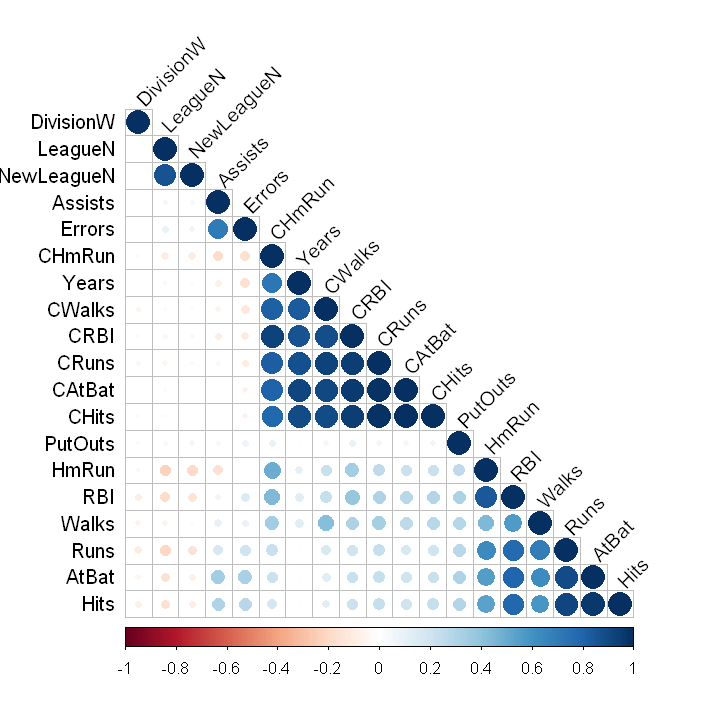

In [8]:
options(repr.plot.width=6,repr.plot.height=6)
corrplot(cor(x), type="lower", order="hclust", tl.col="black", tl.srt=45)

In [9]:
#install.packages("car",dependencies=TRUE,repos="https://cloud.r-project.org")
require(car)

Loading required package: car

Loading required package: carData



In [10]:
round(vif(Hitters.ols),1)

AtBat      Hits     HmRun      Runs       RBI     Walks     Years    CAtBat 
     22.9      30.3       7.8      15.2      11.9       4.1       9.3     251.6 
    CHits    CHmRun     CRuns      CRBI    CWalks    League  Division   PutOuts 
    503.0      46.5     162.5     132.0      19.7       4.1       1.1       1.2 
  Assists    Errors NewLeague 
      2.7       2.2       4.1

Large VIF values indicate multicollinearity.

We obtain the condition number $\kappa$ of the mopdel matrix and the standardized model matrix.

In [11]:
round(kappa(x),1)
round(kappa(x0),1)

[1] 31956.9

[1] 65.5

Adding the intercept colummn of ones (it should be counted in the regression condition number)

In [12]:
n<-nrow(x)
x1<-cbind(rep(1,n),x)
x01<-cbind(rep(1,n),x0)
round(kappa(x1),1)
round(kappa(x01),1)

[1] 26973.7

[1] 65.2

$\kappa$ improves with standardization, but VIF values cannot be modified (correlation is invariant under centering and scaling)

# 02 - Ridge regression

#### [ISLR2 - Chap 6 - Laboratory 2](https://web.stanford.edu/~hastie/ISLR2/Labs/Jupyter_Notebooks/Ch6-varselect-lab.ipynb)

In [13]:
#install.packages("glmnet",dependencies=TRUE,repos="https://cloud.r-project.org")
require(glmnet,quietly=TRUE)

Loaded glmnet 4.1-7



####  A grid of lambda values

In [14]:
grid<-exp(seq(8,0,length=100))

In [15]:
# Syntax: 
# alpha=0 is for ridge regression
# alpha=1 is for 'lasso'  regression (cfr. below)
#
Hitters.ridge.01<-glmnet(x,y,alpha=0,lambda=grid) # raw data
Hitters.ridge.02<-glmnet(x0,y,alpha=0,lambda=grid) # standardized data

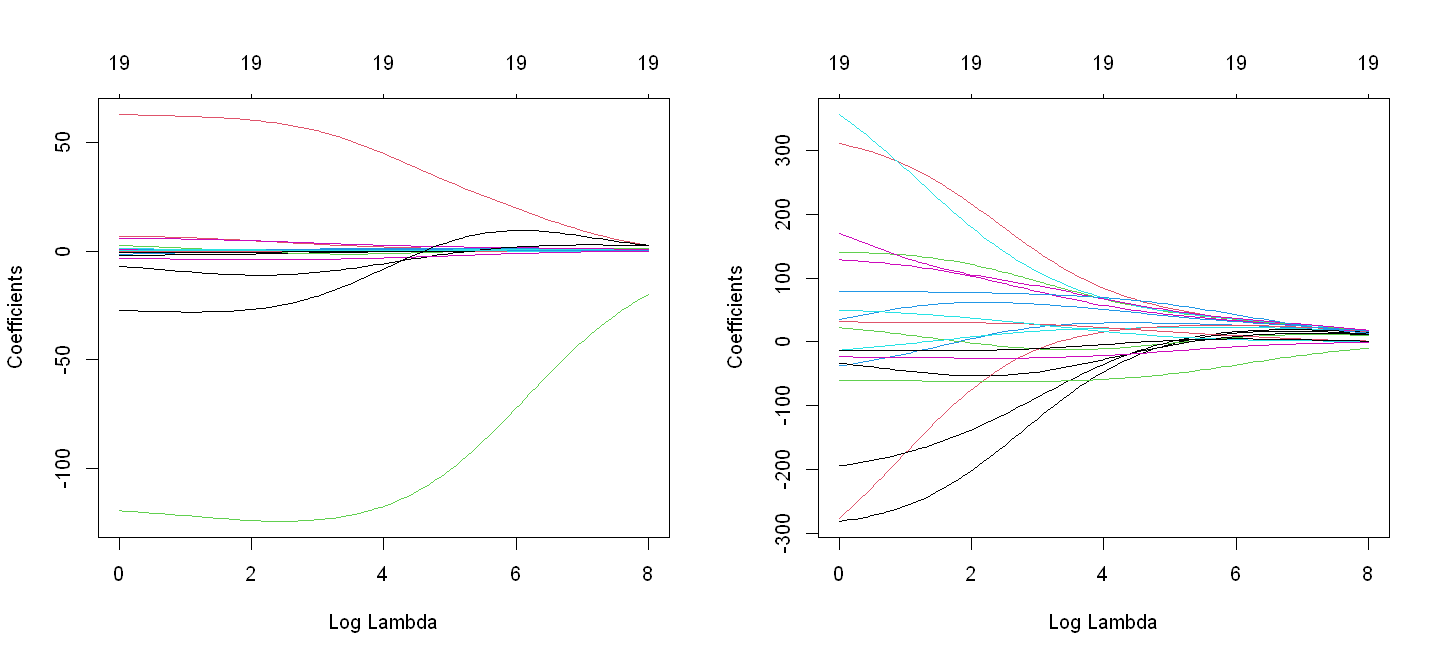

In [16]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.ridge.01,xvar="lambda")
plot(Hitters.ridge.02,xvar="lambda")
par(old.par)

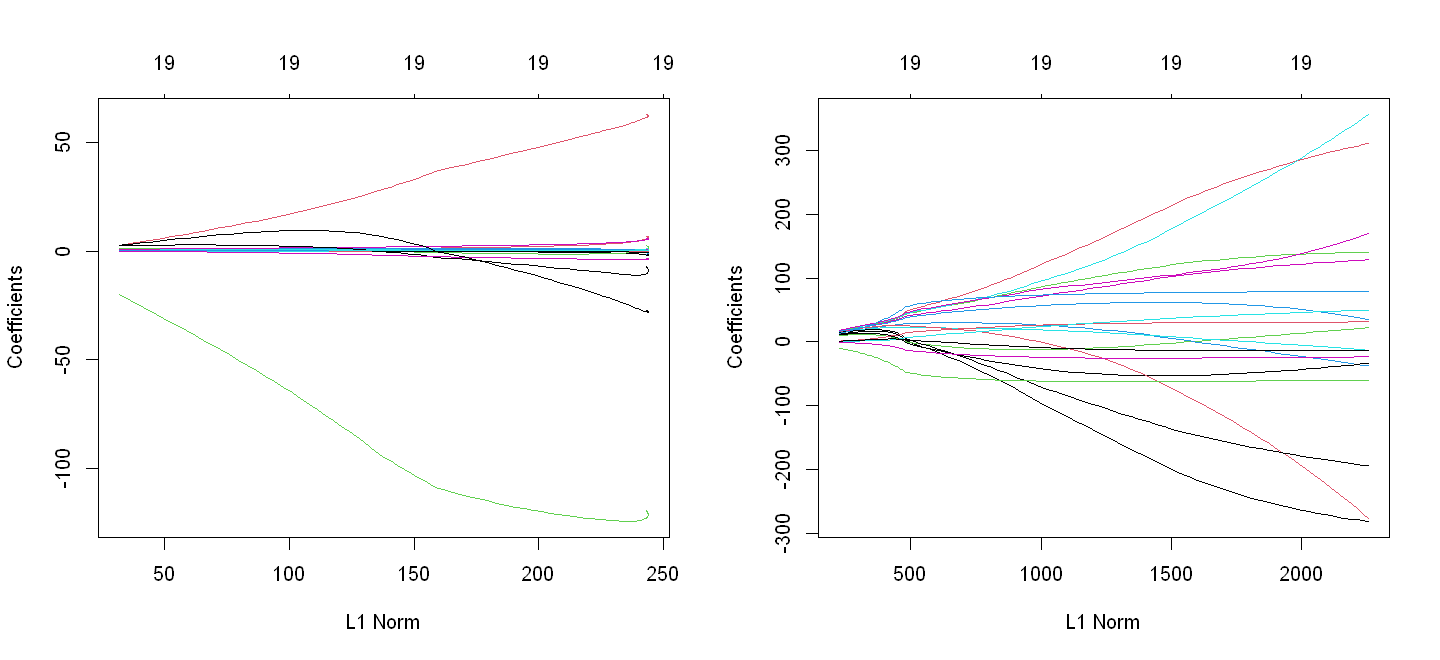

In [17]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.ridge.01,xvar="norm")
plot(Hitters.ridge.02,xvar="norm")
par(old.par)

We can perform CV automatically with `glmnet`. This will produce two quantities that we can look at:

1. lambda.min : $\lambda$ of minimum mean cross-validated error
2. lambda.1se : largest value of $\lambda$ such that error is within 1 standard error of the cross-validated errors for lambda.min.

In [18]:
set.seed(24025)
Hitters.ridge.01.cv<-cv.glmnet(x,y,alpha=0,lambda=grid)
Hitters.ridge.02.cv<-cv.glmnet(x0,y,alpha=0,lambda=grid)

In [19]:
Hitters.ridge.01.lambda.min<-Hitters.ridge.01.cv$lambda.min
Hitters.ridge.02.lambda.min<-Hitters.ridge.02.cv$lambda.min
Hitters.ridge.01.lambda.1se<-Hitters.ridge.01.cv$lambda.1se
Hitters.ridge.02.lambda.1se<-Hitters.ridge.02.cv$lambda.1se
round(c(Hitters.ridge.01.lambda.min,Hitters.ridge.01.lambda.1se),2)
round(c(log(Hitters.ridge.01.lambda.min),log(Hitters.ridge.01.lambda.1se)),2)
round(c(Hitters.ridge.02.lambda.min,Hitters.ridge.02.lambda.1se),2)
round(c(log(Hitters.ridge.02.lambda.min),log(Hitters.ridge.02.lambda.1se)),2)

[1]  191.05 2980.96

[1] 5.25 8.00

[1]    4.28 2980.96

[1] 1.45 8.00

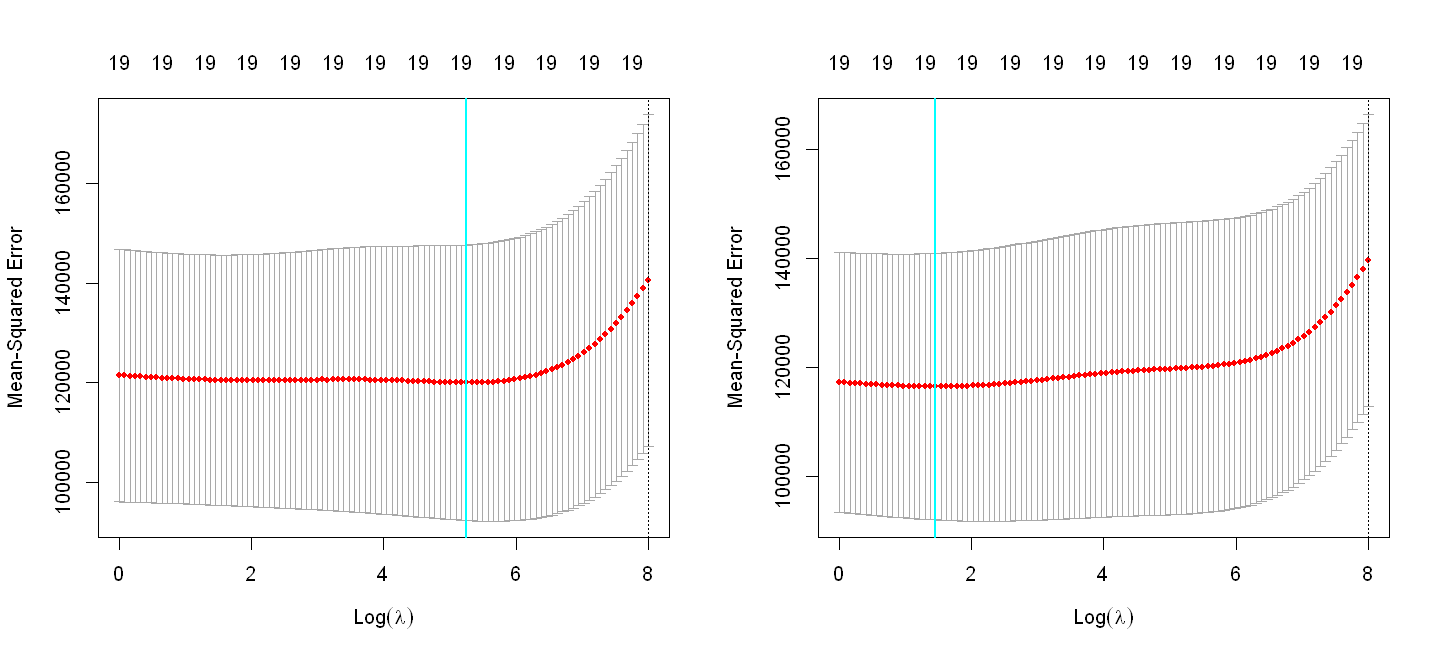

In [20]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.ridge.01.cv)
abline(v=log(Hitters.ridge.01.lambda.min),lwd=2,col="cyan")
plot(Hitters.ridge.02.cv)
abline(v=log(Hitters.ridge.02.lambda.min),lwd=2,col="cyan")
par(old.par)

Let's see if any of the coefficients shrank to zero, implicitely doing feature selection. 

In [21]:
# We extract now the regression coefficients with the 'predict' function
coeff.01<-as.numeric(predict(Hitters.ridge.01,s=Hitters.ridge.01.lambda.min,type="coefficients"))
coeff.02<-as.numeric(predict(Hitters.ridge.02,s=Hitters.ridge.02.lambda.min,type="coefficients"))
round(coeff.01,2)
round(coeff.02,2)

[1]   9.95   0.02   1.05   0.02   1.12   0.87   1.85  -0.21   0.01   0.07
[11]   0.46   0.13   0.14   0.02  28.43 -94.36   0.20   0.05  -1.92   6.51

[1]  535.93 -236.55  252.96    5.49   -7.98    1.78  113.24  -50.06 -125.48
[10]  130.99   59.37  228.43  117.73 -159.45   30.68  -61.52   78.20   41.93
[19]  -24.89  -13.95

In this case, however, all coefficients remain different than zero.

### In case you were wondering
#### (from [stackoverflow](https://stackoverflow.com/questions/39750965/confidence-intervals-for-ridge-regression)): `glmnet` doesn't offer standard errors

It turns out that glmnet doesn't offer standard errors (and therefore doesn't give you confidence intervals) as explained in Park and Casella (2008), _The Bayesian Lasso._   
This question is also addressed in the following excerpt from the vignette in the `penalized` package.

It is a very natural question to ask for standard errors of regression coefficients or other estimated quantities. In principle such standard errors can easily be calculated, e.g. using the bootstrap.

Still, this package deliberately does not provide them. The reason for this is that standard errors are not very meaningful for strongly biased estimates such as arise from penalized estimation methods. Penalized estimation is a procedure that reduces the variance of estimators by introducing substantial bias. The bias of each estimator is therefore a major component of its mean squared error, whereas its variance may contribute only a small part.

Unfortunately, in most applications of penalized regression it is impossible to obtain a sufficiently precise estimate of the bias. Any bootstrap-based calculations can only give an assessment of the variance of the estimates. Reliable estimates of the bias are only available if reliable unbiased estimates are available, which is typically not the case in situations in which penalized estimates are used.

Reporting a standard error of a penalized estimate therefore tells only part of the story. It can give a mistaken impression of great precision, completely ignoring the inaccuracy caused by the bias. It is certainly a mistake to make confidence statements that are only based on an assessment of the variance of the estimates, such as bootstrap-based confidence intervals do.

Reliable confidence intervals around the penalized estimates can be obtained in the case of low dimensional models using the standard generalized linear model theory as implemented in `lm`, `glm` and `coxph`.   

Methods for constructing reliable confidence intervals in the high-dimensional situation are, to my knowledge, not available.

# 03 - Lasso

####  A grid of lambda values

In [22]:
grid<-exp(seq(6,0,length=100))

In [23]:
# Syntax: 
# alpha=0 is for ridge regression
# alpha=1 is for 'lasso'  regression (cfr. below)
#
Hitters.lasso.01<-glmnet(x,y,alpha=1,lambda=grid) # raw data
Hitters.lasso.02<-glmnet(x0,y,alpha=1,lambda=grid) # standardized data

####  Alternatively, specifying the lambda grid from `nlambda` and `lambda.min.ratio`

In [24]:
nlambda<-200
lambda.min.ratio<-10^(-3)

`lambda.min.ratio` is the smallest value for `lambda`, as a fraction of `lambda.max`, the (data derived) entry value (i.e. the smallest value for which all coefficients are zero). 

In [25]:
# Syntax: 
# alpha=0 is for ridge regression
# alpha=1 is for 'lasso'  regression (cfr. below)
#
Hitters.lasso.01<-glmnet(x,y,alpha=1,nlambda=200,lambda.min.ratio=10^(-3)) # raw data
Hitters.lasso.02<-glmnet(x0,y,alpha=1,nlambda=200,lambda.min.ratio=10^(-3)) # standardized data

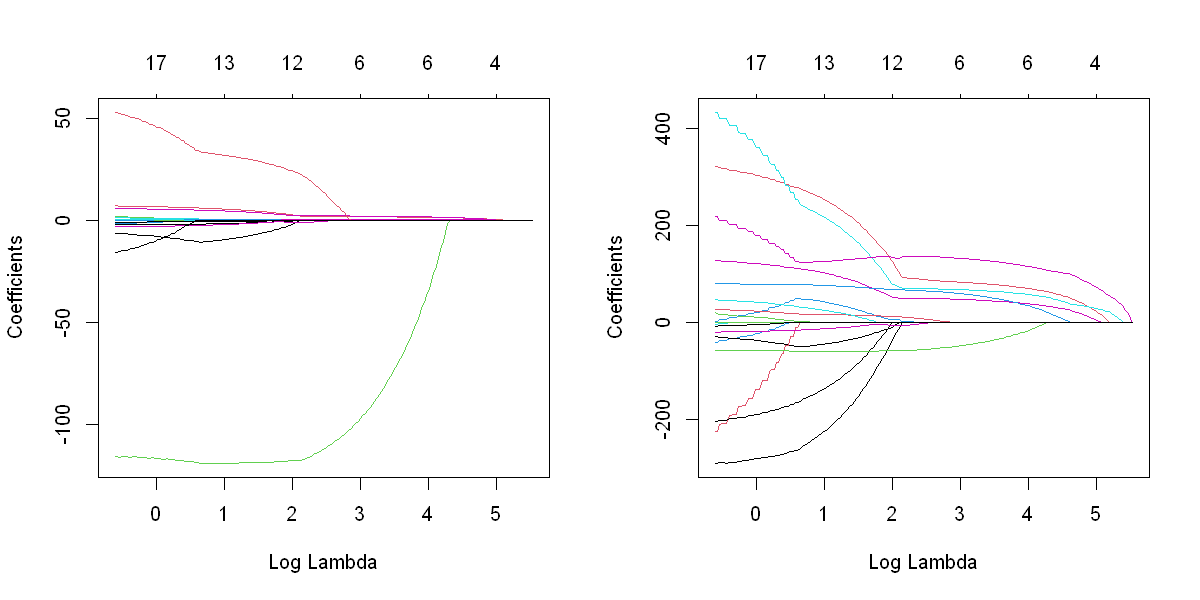

In [26]:
options(repr.plot.width=10,repr.plot.height=5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.lasso.01,xvar="lambda")
plot(Hitters.lasso.02,xvar="lambda")
par(old.par)

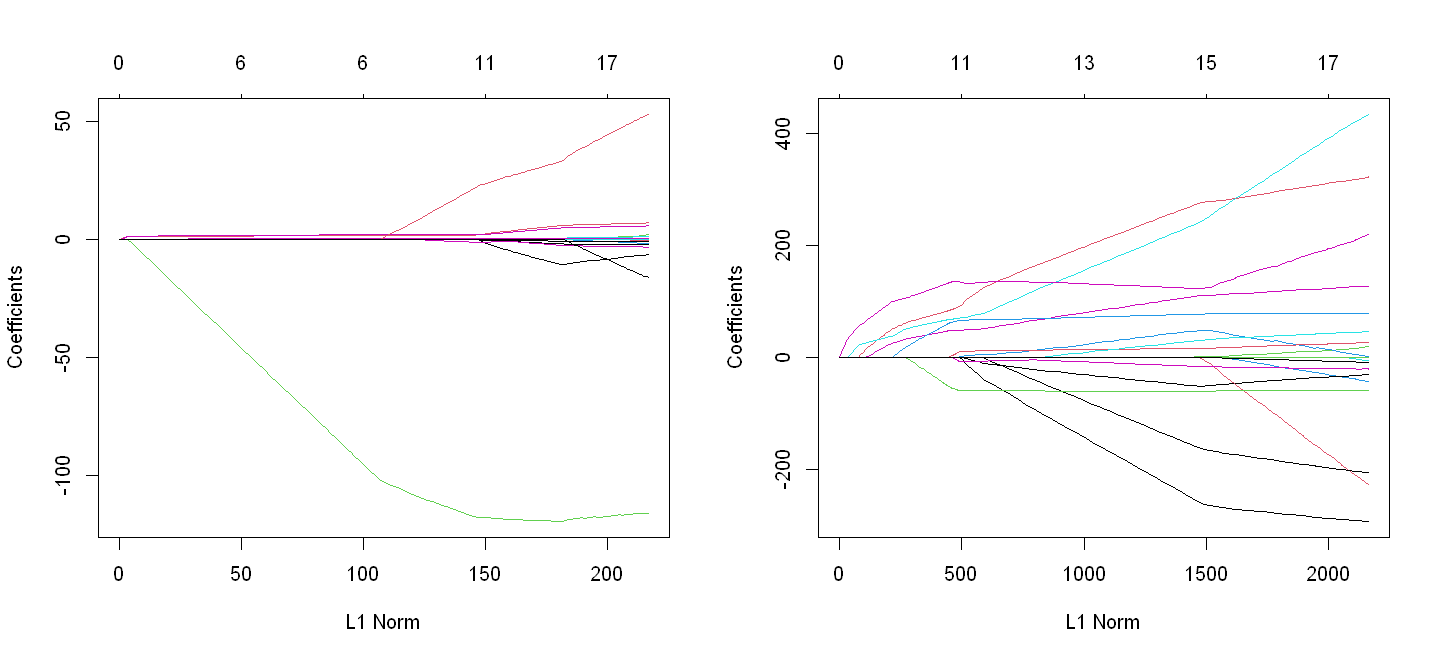

In [27]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.lasso.01,xvar="norm")
plot(Hitters.lasso.02,xvar="norm")
par(old.par)

In [28]:
set.seed(24025)
Hitters.lasso.01.cv<-cv.glmnet(x,y,alpha=1,lambda=grid)
Hitters.lasso.02.cv<-cv.glmnet(x0,y,alpha=1,lambda=grid)

In [29]:
Hitters.lasso.01.lambda.min<-Hitters.lasso.01.cv$lambda.min
Hitters.lasso.02.lambda.min<-Hitters.lasso.02.cv$lambda.min
Hitters.lasso.01.lambda.1se<-Hitters.lasso.01.cv$lambda.1se
Hitters.lasso.02.lambda.1se<-Hitters.lasso.02.cv$lambda.1se
round(c(Hitters.lasso.01.lambda.min,Hitters.lasso.01.lambda.1se),2)
round(c(log(Hitters.lasso.01.lambda.min),log(Hitters.lasso.01.lambda.1se)),2)
round(c(Hitters.lasso.02.lambda.min,Hitters.lasso.02.lambda.1se),2)
round(c(log(Hitters.lasso.02.lambda.min),log(Hitters.lasso.02.lambda.1se)),2)

[1]   2.34 100.09

[1] 0.85 4.61

[1]   2.20 100.09

[1] 0.79 4.61

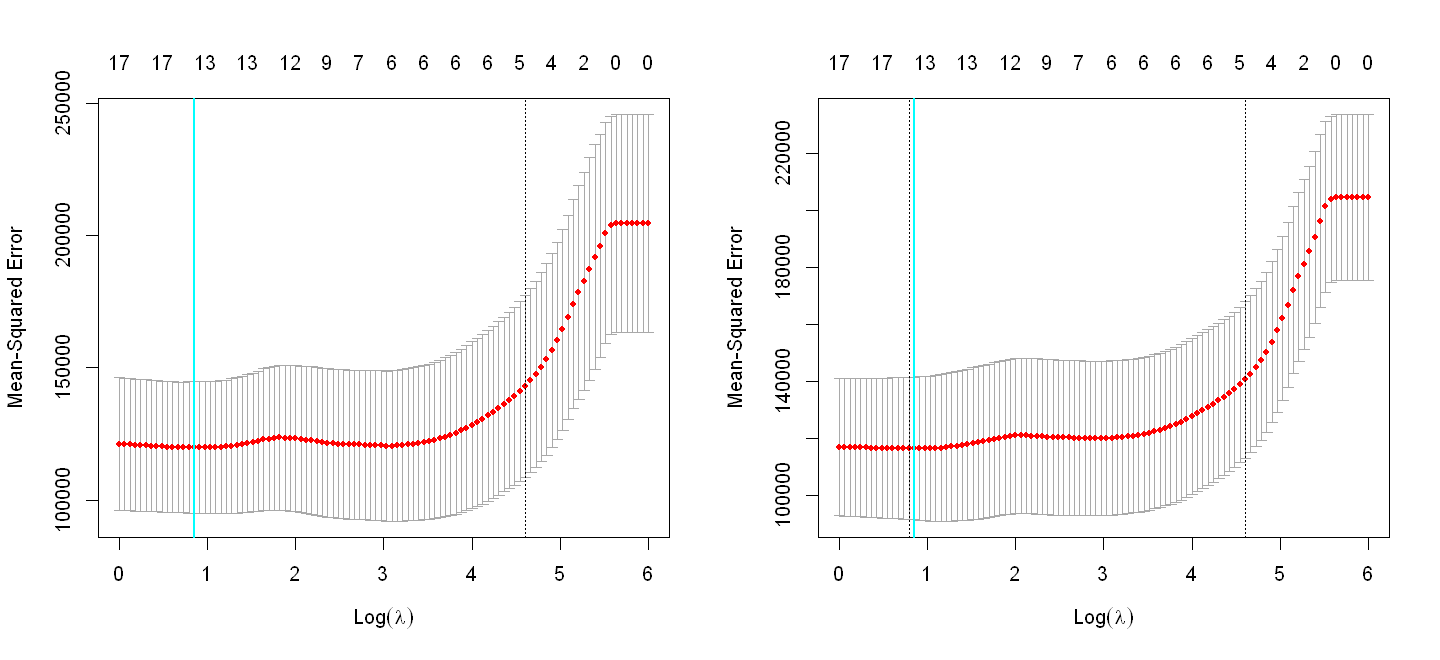

In [30]:
options(repr.plot.width=12,repr.plot.height=5.5)
old.par<-par(mfrow=c(1,2))
plot(Hitters.lasso.01.cv)
abline(v=log(Hitters.lasso.01.lambda.min),lwd=2,col="cyan")
plot(Hitters.lasso.02.cv)
abline(v=log(Hitters.lasso.01.lambda.min),lwd=2,col="cyan")
par(old.par)

### The variable selection feature of the _Lasso_

In [31]:
# We extract now the regression coefficients with the 'predict' function
coeff.01<-as.numeric(predict(Hitters.lasso.01,s=Hitters.lasso.01.lambda.min,type="coefficients"))
coeff.02<-as.numeric(predict(Hitters.lasso.02,s=Hitters.lasso.02.lambda.min,type="coefficients"))
round(rbind(coeff.01,coeff.02),1)

coeff.01,131.5,-1.6,5.9,0.0,0,0,4.9,-10.1,0,0,0.6,0.7,0.4,-0.6,32.7,-119.3,0.3,0.2,-2.2,0
coeff.02,535.9,-247.6,268.6,0.7,0,0,107.7,-49.2,0,0,46.6,233.4,123.9,-153.7,16.5,-59.8,77.3,28.9,-15.1,0


Predictors whose regression coefficient has been shrinked to 0 will be discarded.